# Deep in the Air: Analysis on on-time performance data of airlines in US

BTS (Bureau of Transportation Statistics) provides the on-time performance data in US. The database includes basic flight information like departure&arrival airport and airline carriers. It also provides the info about whether the flight is on-time or not and the delay reasons.

The first thing I am looking into is the flight time's effect on the on-time performance of airlines. I categorize all airlines into 3 time slots per day (morning: 4:00-12:00, afternoon: 12:00-18:00 and night: 18:00-4:00) and 7 days per week. For example, let see how many flights are delayed in those 21 categories in the year of 2017.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3 time categories per day
time_calc=lambda r: 'am' if (r['CRSDepTime']>=400)&(r['CRSDepTime']<1200) else\
                    'pm' if (r['CRSDepTime']>=1200)&(r['CRSDepTime']<1800) else 'night'

# Save analyzed data
timedf=pd.DataFrame(index=pd.MultiIndex.from_product([[1, 2, 3, 4, 5, 6, 7], ['am', 'pm', 'night']],
                                                     names=['DayOfWeek', 'time']))
columns=['flight','delay','delay_min','cancel','delay15',
         'carrier_delay','weather_delay','NAS_delay','late_delay','security_delay']
for col in columns:
    timedf[col]=0

for m in range(1,13):
    file='data/On_Time_On_Time_Performance_2017_'+str(m)+'.csv'
    df=pd.read_csv(file,usecols=list(range(61)),low_memory=False)
    df['time']=df.apply(time_calc,axis=1)
    timedf['flight']+=df.groupby(['DayOfWeek','time']).Year.count()
    timedf['delay']+=df[df.DepDelayMinutes>0].groupby(['DayOfWeek','time']).Year.count()
    timedf['delay_min']+=df.groupby(['DayOfWeek','time']).DepDelayMinutes.sum()
    timedf['delay15']+=df.groupby(['DayOfWeek','time']).DepDel15.sum()
    timedf['cancel']+=df.groupby(['DayOfWeek','time']).Cancelled.sum()

    timedf['carrier_delay']+=df[df.CarrierDelay>0].groupby(['DayOfWeek','time']).Year.count()
    timedf['weather_delay']+=df[df.WeatherDelay>0].groupby(['DayOfWeek','time']).Year.count()
    timedf['NAS_delay']+=df[df.NASDelay>0].groupby(['DayOfWeek','time']).Year.count()
    timedf['late_delay']+=df[df.LateAircraftDelay>0].groupby(['DayOfWeek','time']).Year.count()
    timedf['security_delay']+=df[df.SecurityDelay>0].groupby(['DayOfWeek','time']).Year.count()

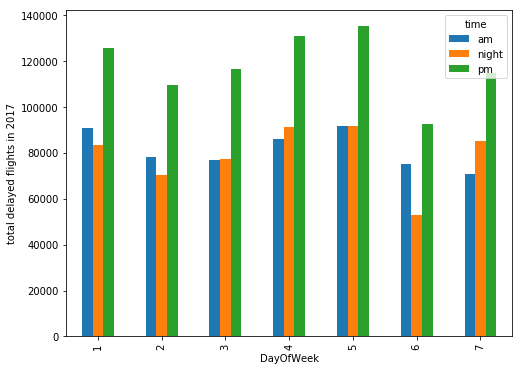

In [2]:
ax=plt.figure(figsize=(8,6)).add_subplot(111)
timedf.delay.unstack().plot(ax=ax,kind='bar')
ax.set_ylabel('total delayed flights in 2017')
plt.show()

We can see that delayed flights in the afternoon are much more than the others. It is possible that there are more flights are scheduled in the afternoon. To give a more straight forward sense of whether the airline will be delayed or not, I am going to use the (delayed flights number)/(all flights number) to represents the probability of airline delay. Here I will only use the flights delayed more than 15min (or cancelled).

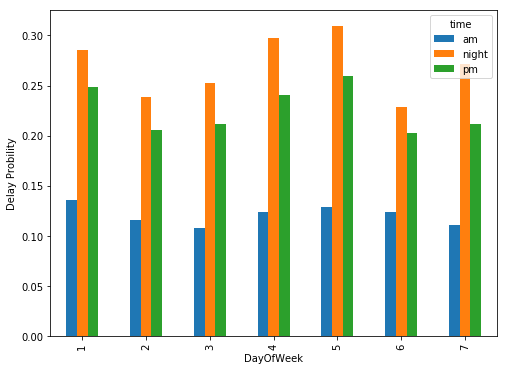

In [3]:
ax=plt.figure(figsize=(8,6)).add_subplot(111)
((timedf.delay15+timedf.cancel)/timedf.flight).unstack().plot(ax=ax,kind='bar')
ax.set_ylabel('Delay Probility')
plt.show()

What do we notice now? Although there are more flights are delayed during afternoon, flights are more likely delayed when they are scheduled at night. Also we can observed the 'wave' trend of bars through out the week. The delay probility reaches its miminum on Tuesday and Wednesday, while highest delay probablities are found on Friday and Monday.